-----

# Crowdguru ratings

#### data transformation, inspection and selection

In [1]:
from os.path import join
from collections import defaultdict

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

from constants import DATA_BASE, TPX_PATH

pd.options.display.max_columns = 80
pd.options.display.max_rows = 200
pd.options.display.precision = 2
np.set_printoptions(precision=2)

-----

### Preparing data

In [2]:
# Reading the data-sheet from Crowdguru
orig = pd.read_excel(join(DATA_BASE, '20181217_Lieferung_Universität Düsseldorf_Label-Bewertungen_Crowd Guru.xlsx')).rename(columns={'Case ID': 'topic_id'})
orig.topic_id -= 1
orig

,CG ID,topic_id,dataset,topic_idx,terms komplett (kommasepariert),term0,term1,term2,term3,term4,term5,term6,term7,term8,term9,label0,Bewertung label0,label1,Bewertung label1,label2,Bewertung label2,label3,Bewertung label3,label4,Bewertung label4,label5,Bewertung label5,label6,Bewertung label6,label7,Bewertung label7,label8,Bewertung label8,label9,Bewertung label9,label10,Bewertung label10,label11,Bewertung label11,label12,Bewertung label12,label13,Bewertung label13,label14,Bewertung label14,label15,Bewertung label15,label16,Bewertung label16,label17,Bewertung label17,label18,Bewertung label18,label19,Bewertung label19,guru_id anonymisiert,Kommentar (optional)
0,20181212_0658,0,PoliticalSpeeches,0,"Wissenschaft, Forschung, Wissenschaftler, Erke...",Wissenschaft,Forschung,Wissenschaftler,Erkenntnis,Professor,Politik,Kunst,Forscher,Krankheit,Gesellschaft,Naturwissenschaftler,1,Wissenschaft,2,Grundlagenforschung,1,Humanwissenschaft,1,Forschung und Lehre,1,Methodologie,1,Wissenschaftler,2,Wissenschaftliche Gesellschaft,1,Runologie,1,Forschung,2,Philosophie,1,Sozialwissenschaften,1,Fachgebiet,1,Anthropologie,1,Neurowissenschaften,1,Akademie der Wissenschaften,1,Philologie,1,Medizingeschichte,1,Wissenschaftliche Arbeit,1,Deutsches Historisches Institut,1,133,NaN
1,20181212_0439,0,PoliticalSpeeches,0,"Wissenschaft, Forschung, Wissenschaftler, Erke...",Wissenschaft,Forschung,Wissenschaftler,Erkenntnis,Professor,Politik,Kunst,Forscher,Krankheit,Gesellschaft,Naturwissenschaftler,3,Wissenschaft,3,Grundlagenforschung,3,Humanwissenschaft,3,Forschung und Lehre,3,Methodologie,2,Wissenschaftler,3,Wissenschaftliche Gesellschaft,3,Runologie,3,Forschung,3,Philosophie,3,Sozialwissenschaften,3,Fachgebiet,3,Anthropologie,3,Neurowissenschaften,2,Akademie der Wissenschaften,3,Philologie,3,Medizingeschichte,2,Wissenschaftliche Arbeit,3,Deutsches Historisches Institut,2,1300537,NaN
2,20181212_0001,0,PoliticalSpeeches,0,"Wissenschaft, Forschung, Wissenschaftler, Erke...",Wissenschaft,Forschung,Wissenschaftler,Erkenntnis,Professor,Politik,Kunst,Forscher,Krankheit,Gesellschaft,Naturwissenschaftler,1,Wissenschaft,3,Grundlagenforschung,1,Humanwissenschaft,1,Forschung und Lehre,2,Methodologie,0,Wissenschaftler,3,Wissenschaftliche Gesellschaft,1,Runologie,0,Forschung,3,Philosophie,0,Sozialwissenschaften,1,Fachgebiet,0,Anthropologie,0,Neurowissenschaften,1,Akademie der Wissenschaften,0,Philologie,0,Medizingeschichte,0,Wissenschaftliche Arbeit,1,Deutsches Historisches Institut,0,3400103,NaN
3,20181212_1972,0,PoliticalSpeeches,0,"Wissenschaft, Forschung, Wissenschaftler, Erke...",Wissenschaft,Forschung,Wissenschaftler,Erkenntnis,Professor,Politik,Kunst,Forscher,Krankheit,Gesellschaft,Naturwissenschaftler,1,Wissenschaft,2,Grundlagenforschung,1,Humanwissenschaft,2,Forschung und Lehre,2,Methodologie,1,Wissenschaftler,2,Wissenschaftliche Gesellschaft,1,Runologie,1,Forschung,2,Philosophie,2,Sozialwissenschaften,2,Fachgebiet,2,Anthropologie,2,Neurowissenschaften,2,Akademie der Wissenschaften,1,Philologie,2,Medizingeschichte,1,Wissenschaftliche Arbeit,2,Deutsches Historisches Institut,1,3800338,NaN
4,20181212_1534,0,PoliticalSpeeches,0,"Wissenschaft, Forschung, Wissenschaftler, Erke...",Wissenschaft,Forschung,Wissenschaftler,Erkenntnis,Professor,Politik,Kunst,Forscher,Krankheit,Gesellschaft,Naturwissenschaftler,1,Wissenschaft,3,Grundlagenforschung,1,Humanwissenschaft,1,Forschung und Lehre,3,Methodologie,1,Wissenschaftler,1,Wissenschaftliche Gesellschaft,2,Runologie,1,Forschung,3,Philosophie,1,Sozialwissenschaften,1,Fachgebiet,1,Anthropologie,1,Neurowissenschaften,1,Akademie der Wissenschaften,1,Philologie,1,Medizingeschichte,1,Wissenschaftliche Arbeit,1,Deutsches Historisches Institut,1,5000555,NaN
5,20181212_1315,0,PoliticalSpeeches,0,"Wissenschaft, Forschung, Wissenschaftler, Erke...",Wissenschaft,Forschung,Wissenschaftler,Erkenntnis,Professor,Politik,Kunst,Forscher,Krankheit,Gesellschaft,Naturwissenschaftler,3,Wissenschaft,3,Grundlagenforschung,3,Humanwissenschaft,3,

In [3]:
id_to_dataset = orig[['topic_id', 'dataset']].groupby('topic_id').first().to_dict()['dataset']
id_to_dataset

{0: 'PoliticalSpeeches',
 1: 'PoliticalSpeeches',
 2: 'PoliticalSpeeches',
 3: 'PoliticalSpeeches',
 4: 'PoliticalSpeeches',
 5: 'PoliticalSpeeches',
 6: 'PoliticalSpeeches',
 7: 'PoliticalSpeeches',
 8: 'PoliticalSpeeches',
 9: 'PoliticalSpeeches',
 10: 'PoliticalSpeeches',
 11: 'PoliticalSpeeches',
 12: 'PoliticalSpeeches',
 13: 'PoliticalSpeeches',
 14: 'PoliticalSpeeches',
 15: 'PoliticalSpeeches',
 16: 'PoliticalSpeeches',
 17: 'PoliticalSpeeches',
 18: 'PoliticalSpeeches',
 19: 'PoliticalSpeeches',
 20: 'PoliticalSpeeches',
 21: 'PoliticalSpeeches',
 22: 'PoliticalSpeeches',
 23: 'PoliticalSpeeches',
 24: 'PoliticalSpeeches',
 25: 'PoliticalSpeeches',
 26: 'PoliticalSpeeches',
 27: 'PoliticalSpeeches',
 28: 'PoliticalSpeeches',
 29: 'PoliticalSpeeches',
 30: 'PoliticalSpeeches',
 31: 'PoliticalSpeeches',
 32: 'PoliticalSpeeches',
 33: 'PoliticalSpeeches',
 34: 'PoliticalSpeeches',
 35: 'PoliticalSpeeches',
 36: 'PoliticalSpeeches',
 37: 'PoliticalSpeeches',
 38: 'PoliticalSpeeche

In [4]:
# Transforming the data to a more usable scheme
# 'guru' refers to a rater (annonymised)

def transform(grp):
    sers = []
    dic = dict()
    for i in range(20):
        label = grp[f'label{i}'][0]
        ratings = grp.loc[:, f'Bewertung label{i}'].reset_index(drop=True).rename(index=lambda x: f'rating{x+1}')
        guru_ids = grp.loc[:, f'guru_id anonymisiert'].reset_index(drop=True).rename(index=lambda x: f'guru{x+1}')
        ser = ratings.append(guru_ids)
        ser.name = label
        sers.append(ser)
    df = pd.DataFrame(sers)
    return df

df = orig.set_index(['CG ID', 'topic_id', 'dataset', 'topic_idx']).iloc[:, 11:].groupby('topic_id', sort=False).apply(transform)
df.index = df.index.rename(names='label', level=-1)
df

rating1  rating2  rating3  rating4  \
topic_id label                                                                  
0        Naturwissenschaftler                    1        3        1        1   
         Wissenschaft                            2        3        3        2   
         Grundlagenforschung                     1        3        1        1   
         Humanwissenschaft                       1        3        1        2   
         Forschung und Lehre                     1        3        2        2   
         Methodologie                            1        2        0        1   
         Wissenschaftler                         2        3        3        2   
         Wissenschaftliche Gesellschaft          1        3        1        1   
         Runologie                               1        3        0        1   
         Forschung                               2        3        3        2   
         Philosophie                             1        3        0        2   
         Sozialwissenschaften                    1        3        1        2   
         Fachgebiet                              1        3        0        2   
         Anthropologie                           1        3        0        2   
         Neurowissenschaften                     1        2        1        2   
         Akademie der Wissenschaften             1        3        0        1   
         Philologie                              1        3        0        2   
         Medizingeschichte                       1        2        0        1   
         Wissenschaftliche Arbeit                1        3        1        2   
         Deutsches Historisches Institut         1        2        0        1   
1        Aspekte Salzburg                        1        0        1        0   
         Klassische Musik                        1        3        2        3   
         Andreas Staier                          1        0        1        0   
         Musik sein                              1        0        1        3   
         Kunstform                               1        1        1        3   
         Hochschule für Musik                    1        1        1        3   
         Bayerischer Poetentaler                 1        0        1        0   
         Musik                                   2        2        2        3   
         Konzert                                 1        3        2        3   
         Alte Musik                              1        2        1        3   
         Aufführung                              1        2        1        3   
         Neue Musik                              1        2        1        3   
         Weltmusik                               1        1        1        3   
         Musikkritiker                           1        0        2        1   
         Volksmusik                              1        1        1        3   
         Singer-Songwriter                       1        0        1        3   
         Musiker                                 1        2        2        3   
         Liederabend                             1        1        2        3   
         Tanzmusik                               1        0        1        3   
         Liedermacher                            1        0        2        3   
2        Religion                                3        2        3        3   
         Heilige Schriften                       1        1        0        1   
         Christentum                             1        1        1        3   
         Ostkirchenkunde                         1        0        0        2   
         Judentum                                1        1        0        2   
         Religiöse Minderheit                    1        2        0        1   
         Atheismus                               1        2        0        0   
         Offenbarungsreligion                    1        2        0      

In [5]:
df.to_csv(join(DATA_BASE, 'crowdguru_ratings_all.csv'))

In [6]:
# Shortcuts to index ratings and raters (gurus)
rate_cols = [f'rating{i}' for i in range(1, 11)]
guru_cols = [f'guru{i}' for i in range(1, 11)]

In [7]:
'Number of unique raters:', np.unique(df[guru_cols].values).size

('Number of unique raters:', 71)

In [8]:
# There are always exactly 10 raters per topic, 
# which helps to calculate correlation and inter-rater agreement among raters

df.groupby('topic_id').apply(lambda x: np.unique(x[guru_cols].values).size).max()

10

In [9]:
# for comfort generate a DataFrame from ratings only

ratings = df[rate_cols].copy()
ratings

rating1  rating2  rating3  rating4  \
topic_id label                                                                  
0        Naturwissenschaftler                    1        3        1        1   
         Wissenschaft                            2        3        3        2   
         Grundlagenforschung                     1        3        1        1   
         Humanwissenschaft                       1        3        1        2   
         Forschung und Lehre                     1        3        2        2   
         Methodologie                            1        2        0        1   
         Wissenschaftler                         2        3        3        2   
         Wissenschaftliche Gesellschaft          1        3        1        1   
         Runologie                               1        3        0        1   
         Forschung                               2        3        3        2   
         Philosophie                             1        3        0        2   
         Sozialwissenschaften                    1        3        1        2   
         Fachgebiet                              1        3        0        2   
         Anthropologie                           1        3        0        2   
         Neurowissenschaften                     1        2        1        2   
         Akademie der Wissenschaften             1        3        0        1   
         Philologie                              1        3        0        2   
         Medizingeschichte                       1        2        0        1   
         Wissenschaftliche Arbeit                1        3        1        2   
         Deutsches Historisches Institut         1        2        0        1   
1        Aspekte Salzburg                        1        0        1        0   
         Klassische Musik                        1        3        2        3   
         Andreas Staier                          1        0        1        0   
         Musik sein                              1        0        1        3   
         Kunstform                               1        1        1        3   
         Hochschule für Musik                    1        1        1        3   
         Bayerischer Poetentaler                 1        0        1        0   
         Musik                                   2        2        2        3   
         Konzert                                 1        3        2        3   
         Alte Musik                              1        2        1        3   
         Aufführung                              1        2        1        3   
         Neue Musik                              1        2        1        3   
         Weltmusik                               1        1        1        3   
         Musikkritiker                           1        0        2        1   
         Volksmusik                              1        1        1        3   
         Singer-Songwriter                       1        0        1        3   
         Musiker                                 1        2        2        3   
         Liederabend                             1        1        2        3   
         Tanzmusik                               1        0        1        3   
         Liedermacher                            1        0        2        3   
2        Religion                                3        2        3        3   
         Heilige Schriften                       1        1        0        1   
         Christentum                             1        1        1        3   
         Ostkirchenkunde                         1        0        0        2   
         Judentum                                1        1        0        2   
         Religiöse Minderheit                    1        2        0        1   
         Atheismus                               1        2        0        0   
         Offenbarungsreligion                    1        2        0      

In [10]:
# Now we can get on overview of all gurus per topic

gurus = df[guru_cols].groupby('topic_id').first()
gurus

,guru1,guru2,guru3,guru4,guru5,guru6,guru7,guru8,guru9,guru10
topic_id,,,,,,,,,,
0,133,1300537,3400103,3800338,5000555,5500469,6000143,6800408,8000582,8500047
1,133,1500439,2000137,5500469,5800222,6000151,6200375,6400134,6800408,7400575
2,133,2300128,3400103,3500144,3500531,3800338,6400134,6800408,8000582,8500047
3,133,500321,1300537,1800143,3500531,6800408,7400575,8000582,8500047,9100058
4,133,1800143,3400504,3800338,5000555,6800408,7700376,7800484,8000582,8500047
5,133,1100161,2600295,3400103,3800338,5500469,6000143,6500418,6800408,9000581
6,133,500321,1500439,1800143,3400504,4800293,6800408,8000582,8500047,9000581
7,133,1800143,3500144,4200319,6000143,6200375,6800408,7800484,8000582,9000581
8,133,500321,2100580,2300128,3800288,3800338,4000580,5400560,6800408,9900581


-----

### Calculating raters correlation

In [11]:
# Calculate raters correlation per topic

def mean_corr(grp, method='pearson'):
    grp_corr = grp.corr(method)
    mask = grp_corr == 1.
    grp_corr[mask.values] = np.nan
    return grp_corr.mean()

rate_corr = ratings.groupby('topic_id').apply(mean_corr)
print(f'Avg correlation among all raters and topics: {rate_corr.mean().mean():.2f}')
rate_corr

Avg correlation among all raters and topics: 0.34


,rating1,rating2,rating3,rating4,rating5,rating6,rating7,rating8,rating9,rating10
topic_id,,,,,,,,,,
0,2.70e-01,2.83e-01,3.44e-01,0.24,0.27,0.20,2.72e-01,1.24e-02,-8.42e-02,1.84e-01
1,3.15e-01,4.87e-01,3.11e-01,0.20,0.26,0.54,3.69e-01,5.40e-01,3.74e-01,1.98e-01
2,5.25e-01,3.08e-01,4.97e-01,0.50,0.54,0.41,4.48e-01,4.76e-01,-2.81e-01,4.63e-01
3,3.90e-01,4.75e-01,3.73e-01,0.19,0.37,0.49,3.98e-01,2.24e-01,3.94e-01,3.36e-01
4,3.01e-01,3.30e-01,2.94e-01,0.42,0.33,0.16,1.91e-01,3.93e-01,-6.53e-02,3.58e-01
5,4.85e-01,3.15e-01,5.70e-01,0.39,0.48,0.11,5.96e-01,5.73e-01,5.51e-01,5.58e-01
6,5.95e-01,5.60e-01,5.03e-01,0.63,0.53,0.58,5.18e-01,2.85e-01,4.55e-01,5.76e-01
7,2.97e-01,4.32e-01,5.22e-01,0.60,0.65,0.57,4.76e-01,6.43e-01,4.93e-01,5.81e-01
8,3.29e-01,4.55e-01,9.22e-02,0.29,0.37,0.40,3.15e-01,4.58e-01,2.11e-01,2.83e-01


In [12]:
# calculate and average the individual rater correlations per guru

individual_rater_corr = defaultdict(list)
for i in range(219):
    for j in range(10):
        guru = gurus.iloc[i, j]
        corr = rate_corr.iloc[i, j]
        individual_rater_corr[guru].append(corr)

corr_list = []
for ann, cor in individual_rater_corr.items():
    a = np.mean(cor)
    b = np.nanmean(cor)
    corr_list.append((b, a, ann))

df_corr = pd.DataFrame.from_records(sorted(corr_list), columns=['cor_ign_nan', 'cor_w_nan', 'guru'])
df_corr

,cor_ign_nan,cor_w_nan,guru
0,0.16,NaN,8000582
1,0.19,NaN,1800484
2,0.24,NaN,9700336
3,0.24,0.24,7400575
4,0.24,0.24,7800217
5,0.26,0.26,9000581
6,0.27,0.27,2600582
7,0.27,0.27,2000137
8,0.27,NaN,9100058
9,0.27,0.27,8100414


In [13]:
# list gurus with low correlation
bad_gurus = bad_gurus_pearson = df_corr.loc[df_corr.cor_ign_nan < 0.33, 'guru']
bad_gurus_pearson

0     8000582
1     1800484
2     9700336
3     7400575
4     7800217
5     9000581
6     2600582
7     2000137
8     9100058
9     8100414
10    4000030
11     500559
12    3800288
13    9900581
14    2100580
15    4600523
16    4200319
17    1100242
18    5800534
19    5500469
20    5000555
21    1300537
22    8500047
23    1000267
Name: guru, dtype: int64

In [14]:
# Remove ratings made by gurus who correlate less than 0.4 with other raters

guru_mask = df[guru_cols].applymap(lambda x: x in bad_gurus.values)
ratings_cleaned_part = ratings.copy()
ratings_cleaned_part[guru_mask.values] = np.nan
ratings_cleaned_part

rating1  rating2  rating3  rating4  \
topic_id label                                                                  
0        Naturwissenschaftler                  1.0      NaN      1.0      1.0   
         Wissenschaft                          2.0      NaN      3.0      2.0   
         Grundlagenforschung                   1.0      NaN      1.0      1.0   
         Humanwissenschaft                     1.0      NaN      1.0      2.0   
         Forschung und Lehre                   1.0      NaN      2.0      2.0   
         Methodologie                          1.0      NaN      0.0      1.0   
         Wissenschaftler                       2.0      NaN      3.0      2.0   
         Wissenschaftliche Gesellschaft        1.0      NaN      1.0      1.0   
         Runologie                             1.0      NaN      0.0      1.0   
         Forschung                             2.0      NaN      3.0      2.0   
         Philosophie                           1.0      NaN      0.0      2.0   
         Sozialwissenschaften                  1.0      NaN      1.0      2.0   
         Fachgebiet                            1.0      NaN      0.0      2.0   
         Anthropologie                         1.0      NaN      0.0      2.0   
         Neurowissenschaften                   1.0      NaN      1.0      2.0   
         Akademie der Wissenschaften           1.0      NaN      0.0      1.0   
         Philologie                            1.0      NaN      0.0      2.0   
         Medizingeschichte                     1.0      NaN      0.0      1.0   
         Wissenschaftliche Arbeit              1.0      NaN      1.0      2.0   
         Deutsches Historisches Institut       1.0      NaN      0.0      1.0   
1        Aspekte Salzburg                      1.0      0.0      NaN      NaN   
         Klassische Musik                      1.0      3.0      NaN      NaN   
         Andreas Staier                        1.0      0.0      NaN      NaN   
         Musik sein                            1.0      0.0      NaN      NaN   
         Kunstform                             1.0      1.0      NaN      NaN   
         Hochschule für Musik                  1.0      1.0      NaN      NaN   
         Bayerischer Poetentaler               1.0      0.0      NaN      NaN   
         Musik                                 2.0      2.0      NaN      NaN   
         Konzert                               1.0      3.0      NaN      NaN   
         Alte Musik                            1.0      2.0      NaN      NaN   
         Aufführung                            1.0      2.0      NaN      NaN   
         Neue Musik                            1.0      2.0      NaN      NaN   
         Weltmusik                             1.0      1.0      NaN      NaN   
         Musikkritiker                         1.0      0.0      NaN      NaN   
         Volksmusik                            1.0      1.0      NaN      NaN   
         Singer-Songwriter                     1.0      0.0      NaN      NaN   
         Musiker                               1.0      2.0      NaN      NaN   
         Liederabend                           1.0      1.0      NaN      NaN   
         Tanzmusik                             1.0      0.0      NaN      NaN   
         Liedermacher                          1.0      0.0      NaN      NaN   
2        Religion                              3.0      2.0      3.0      3.0   
         Heilige Schriften                     1.0      1.0      0.0      1.0   
         Christentum                           1.0      1.0      1.0      3.0   
         Ostkirchenkunde                       1.0      0.0      0.0      2.0   
         Judentum                              1.0      1.0      0.0      2.0   
         Religiöse Minderheit                  1.0      2.0      0.0      1.0   
         Atheismus                             1.0      2.0      0.0      0.0   
         Offenbarungsreligion                  1.0      2.0      0.0      

-----

### Addressing constant ratings over all labels of one topic

It is debatable if those should be removed or not

In [15]:
# find gurus whose ratings do not vary (resulting in corr == NaN)
g = gurus.copy()
g[~rate_corr.isnull().values] = 0
g_sum = g.sum(axis=1)
print('the following gurus have rated some cases uniformly:')
print(np.unique(g[g_sum > 0].values).tolist()[1:])
constant_ratings = g[g_sum > 0]
constant_ratings

the following gurus have rated some cases uniformly:
[133, 1300537, 1800484, 2600295, 3800338, 4200319, 4400145, 5000555, 5500469, 5800534, 6000143, 6200375, 6800408, 7700376, 7800484, 8000582, 9100058, 9700336, 9900581]


,guru1,guru2,guru3,guru4,guru5,guru6,guru7,guru8,guru9,guru10
topic_id,,,,,,,,,,
9,0,0,5500469,0,0,0,0,0,0,0
13,133,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,9100058,0
24,0,0,0,0,0,5000555,0,0,8000582,0
27,133,0,0,0,0,0,0,0,0,0
28,0,0,0,0,0,0,0,0,8000582,9100058
36,0,0,0,0,0,0,0,0,8000582,0
39,0,0,0,0,5500469,0,0,0,0,0
48,133,0,0,0,0,0,0,0,0,8000582


In [16]:
# remove constant ratings over one topic
def remove_constants(grp):
    if grp.name in constant_ratings.index:
        mask = constant_ratings.loc[grp.name] > 0
        grp.loc[:, mask.values] = np.nan
    return grp

In [17]:
# on the full data
ratings_removed_constants = ratings.groupby('topic_id').apply(remove_constants)
ratings_removed_constants

rating1  rating2  rating3  rating4  \
topic_id label                                                                  
0        Naturwissenschaftler                  1.0      3.0      1.0      1.0   
         Wissenschaft                          2.0      3.0      3.0      2.0   
         Grundlagenforschung                   1.0      3.0      1.0      1.0   
         Humanwissenschaft                     1.0      3.0      1.0      2.0   
         Forschung und Lehre                   1.0      3.0      2.0      2.0   
         Methodologie                          1.0      2.0      0.0      1.0   
         Wissenschaftler                       2.0      3.0      3.0      2.0   
         Wissenschaftliche Gesellschaft        1.0      3.0      1.0      1.0   
         Runologie                             1.0      3.0      0.0      1.0   
         Forschung                             2.0      3.0      3.0      2.0   
         Philosophie                           1.0      3.0      0.0      2.0   
         Sozialwissenschaften                  1.0      3.0      1.0      2.0   
         Fachgebiet                            1.0      3.0      0.0      2.0   
         Anthropologie                         1.0      3.0      0.0      2.0   
         Neurowissenschaften                   1.0      2.0      1.0      2.0   
         Akademie der Wissenschaften           1.0      3.0      0.0      1.0   
         Philologie                            1.0      3.0      0.0      2.0   
         Medizingeschichte                     1.0      2.0      0.0      1.0   
         Wissenschaftliche Arbeit              1.0      3.0      1.0      2.0   
         Deutsches Historisches Institut       1.0      2.0      0.0      1.0   
1        Aspekte Salzburg                      1.0      0.0      1.0      0.0   
         Klassische Musik                      1.0      3.0      2.0      3.0   
         Andreas Staier                        1.0      0.0      1.0      0.0   
         Musik sein                            1.0      0.0      1.0      3.0   
         Kunstform                             1.0      1.0      1.0      3.0   
         Hochschule für Musik                  1.0      1.0      1.0      3.0   
         Bayerischer Poetentaler               1.0      0.0      1.0      0.0   
         Musik                                 2.0      2.0      2.0      3.0   
         Konzert                               1.0      3.0      2.0      3.0   
         Alte Musik                            1.0      2.0      1.0      3.0   
         Aufführung                            1.0      2.0      1.0      3.0   
         Neue Musik                            1.0      2.0      1.0      3.0   
         Weltmusik                             1.0      1.0      1.0      3.0   
         Musikkritiker                         1.0      0.0      2.0      1.0   
         Volksmusik                            1.0      1.0      1.0      3.0   
         Singer-Songwriter                     1.0      0.0      1.0      3.0   
         Musiker                               1.0      2.0      2.0      3.0   
         Liederabend                           1.0      1.0      2.0      3.0   
         Tanzmusik                             1.0      0.0      1.0      3.0   
         Liedermacher                          1.0      0.0      2.0      3.0   
2        Religion                              3.0      2.0      3.0      3.0   
         Heilige Schriften                     1.0      1.0      0.0      1.0   
         Christentum                           1.0      1.0      1.0      3.0   
         Ostkirchenkunde                       1.0      0.0      0.0      2.0   
         Judentum                              1.0      1.0      0.0      2.0   
         Religiöse Minderheit                  1.0      2.0      0.0      1.0   
         Atheismus                             1.0      2.0      0.0      0.0   
         Offenbarungsreligion                  1.0      2.0      0.0      

In [18]:
# on the already partially cleaned data
ratings_cleaned_full = ratings_cleaned_part.groupby('topic_id').apply(remove_constants)
ratings_cleaned_full

rating1  rating2  rating3  rating4  \
topic_id label                                                                  
0        Naturwissenschaftler                  1.0      NaN      1.0      1.0   
         Wissenschaft                          2.0      NaN      3.0      2.0   
         Grundlagenforschung                   1.0      NaN      1.0      1.0   
         Humanwissenschaft                     1.0      NaN      1.0      2.0   
         Forschung und Lehre                   1.0      NaN      2.0      2.0   
         Methodologie                          1.0      NaN      0.0      1.0   
         Wissenschaftler                       2.0      NaN      3.0      2.0   
         Wissenschaftliche Gesellschaft        1.0      NaN      1.0      1.0   
         Runologie                             1.0      NaN      0.0      1.0   
         Forschung                             2.0      NaN      3.0      2.0   
         Philosophie                           1.0      NaN      0.0      2.0   
         Sozialwissenschaften                  1.0      NaN      1.0      2.0   
         Fachgebiet                            1.0      NaN      0.0      2.0   
         Anthropologie                         1.0      NaN      0.0      2.0   
         Neurowissenschaften                   1.0      NaN      1.0      2.0   
         Akademie der Wissenschaften           1.0      NaN      0.0      1.0   
         Philologie                            1.0      NaN      0.0      2.0   
         Medizingeschichte                     1.0      NaN      0.0      1.0   
         Wissenschaftliche Arbeit              1.0      NaN      1.0      2.0   
         Deutsches Historisches Institut       1.0      NaN      0.0      1.0   
1        Aspekte Salzburg                      1.0      0.0      NaN      NaN   
         Klassische Musik                      1.0      3.0      NaN      NaN   
         Andreas Staier                        1.0      0.0      NaN      NaN   
         Musik sein                            1.0      0.0      NaN      NaN   
         Kunstform                             1.0      1.0      NaN      NaN   
         Hochschule für Musik                  1.0      1.0      NaN      NaN   
         Bayerischer Poetentaler               1.0      0.0      NaN      NaN   
         Musik                                 2.0      2.0      NaN      NaN   
         Konzert                               1.0      3.0      NaN      NaN   
         Alte Musik                            1.0      2.0      NaN      NaN   
         Aufführung                            1.0      2.0      NaN      NaN   
         Neue Musik                            1.0      2.0      NaN      NaN   
         Weltmusik                             1.0      1.0      NaN      NaN   
         Musikkritiker                         1.0      0.0      NaN      NaN   
         Volksmusik                            1.0      1.0      NaN      NaN   
         Singer-Songwriter                     1.0      0.0      NaN      NaN   
         Musiker                               1.0      2.0      NaN      NaN   
         Liederabend                           1.0      1.0      NaN      NaN   
         Tanzmusik                             1.0      0.0      NaN      NaN   
         Liedermacher                          1.0      0.0      NaN      NaN   
2        Religion                              3.0      2.0      3.0      3.0   
         Heilige Schriften                     1.0      1.0      0.0      1.0   
         Christentum                           1.0      1.0      1.0      3.0   
         Ostkirchenkunde                       1.0      0.0      0.0      2.0   
         Judentum                              1.0      1.0      0.0      2.0   
         Religiöse Minderheit                  1.0      2.0      0.0      1.0   
         Atheismus                             1.0      2.0      0.0      0.0   
         Offenbarungsreligion                  1.0      2.0      0.0      

In [20]:
ratings_cleaned_full.to_csv(join(DATA_BASE, 'crowdguru_ratings_reduced.csv'))

In [19]:
rate_corr = ratings_cleaned_full.groupby('topic_id').apply(mean_corr)
print(f'Avg correlation after removing: {rate_corr.mean().mean():.2f}')
rate_corr

Avg correlation after removing: 0.41


,rating1,rating2,rating3,rating4,rating5,rating6,rating7,rating8,rating9,rating10
topic_id,,,,,,,,,,
0,3.68e-01,NaN,0.43,0.38,NaN,NaN,3.83e-01,0.03,NaN,NaN
1,3.86e-01,0.53,NaN,NaN,0.34,0.63,4.74e-01,0.56,0.43,NaN
2,6.38e-01,0.38,0.59,0.56,0.66,0.54,5.15e-01,0.57,NaN,NaN
3,5.18e-01,0.39,NaN,0.34,0.54,0.56,NaN,NaN,NaN,NaN
4,3.38e-01,0.27,0.39,0.46,NaN,0.17,2.25e-01,0.46,NaN,NaN
5,5.34e-01,0.34,0.60,0.42,0.55,NaN,6.25e-01,0.60,0.56,NaN
6,6.57e-01,0.62,0.53,0.66,0.57,0.64,5.53e-01,NaN,NaN,NaN
7,2.44e-01,0.44,0.46,NaN,0.64,0.57,4.44e-01,0.60,NaN,NaN
8,3.98e-01,0.43,NaN,0.35,NaN,0.45,3.32e-01,0.47,0.26,NaN


-----

### Some statistics over the ratings (original data, partial cleaning, full cleaning)

In [21]:
def calc_stats(df_ratings):
    statz = df_ratings.copy()
    statz['avg'] = df_ratings.mean(axis=1)
    statz['sd'] = df_ratings.std(axis=1)
    statz['cnt'] = df_ratings.count(axis=1)
    print(f'Avg rating per topic: {statz.avg.mean():.2f}')
    print(f'Avg # of raters per topic: {statz.cnt.mean():.2f}')
    return statz

In [22]:
# over all ratings
statz_full = calc_stats(ratings)
statz_full

Avg rating per topic: 1.41
Avg # of raters per topic: 10.00


rating1  rating2  rating3  rating4  \
topic_id label                                                                  
0        Naturwissenschaftler                    1        3        1        1   
         Wissenschaft                            2        3        3        2   
         Grundlagenforschung                     1        3        1        1   
         Humanwissenschaft                       1        3        1        2   
         Forschung und Lehre                     1        3        2        2   
         Methodologie                            1        2        0        1   
         Wissenschaftler                         2        3        3        2   
         Wissenschaftliche Gesellschaft          1        3        1        1   
         Runologie                               1        3        0        1   
         Forschung                               2        3        3        2   
         Philosophie                             1        3        0        2   
         Sozialwissenschaften                    1        3        1        2   
         Fachgebiet                              1        3        0        2   
         Anthropologie                           1        3        0        2   
         Neurowissenschaften                     1        2        1        2   
         Akademie der Wissenschaften             1        3        0        1   
         Philologie                              1        3        0        2   
         Medizingeschichte                       1        2        0        1   
         Wissenschaftliche Arbeit                1        3        1        2   
         Deutsches Historisches Institut         1        2        0        1   
1        Aspekte Salzburg                        1        0        1        0   
         Klassische Musik                        1        3        2        3   
         Andreas Staier                          1        0        1        0   
         Musik sein                              1        0        1        3   
         Kunstform                               1        1        1        3   
         Hochschule für Musik                    1        1        1        3   
         Bayerischer Poetentaler                 1        0        1        0   
         Musik                                   2        2        2        3   
         Konzert                                 1        3        2        3   
         Alte Musik                              1        2        1        3   
         Aufführung                              1        2        1        3   
         Neue Musik                              1        2        1        3   
         Weltmusik                               1        1        1        3   
         Musikkritiker                           1        0        2        1   
         Volksmusik                              1        1        1        3   
         Singer-Songwriter                       1        0        1        3   
         Musiker                                 1        2        2        3   
         Liederabend                             1        1        2        3   
         Tanzmusik                               1        0        1        3   
         Liedermacher                            1        0        2        3   
2        Religion                                3        2        3        3   
         Heilige Schriften                       1        1        0        1   
         Christentum                             1        1        1        3   
         Ostkirchenkunde                         1        0        0        2   
         Judentum                                1        1        0        2   
         Religiöse Minderheit                    1        2        0        1   
         Atheismus                               1        2        0        0   
         Offenbarungsreligion                    1        2        0      

In [23]:
# over ratings with removed constant ratings
statz_removed_constants = calc_stats(ratings_removed_constants)
statz_removed_constants

Avg rating per topic: 1.40
Avg # of raters per topic: 9.69


rating1  rating2  rating3  rating4  \
topic_id label                                                                  
0        Naturwissenschaftler                  1.0      3.0      1.0      1.0   
         Wissenschaft                          2.0      3.0      3.0      2.0   
         Grundlagenforschung                   1.0      3.0      1.0      1.0   
         Humanwissenschaft                     1.0      3.0      1.0      2.0   
         Forschung und Lehre                   1.0      3.0      2.0      2.0   
         Methodologie                          1.0      2.0      0.0      1.0   
         Wissenschaftler                       2.0      3.0      3.0      2.0   
         Wissenschaftliche Gesellschaft        1.0      3.0      1.0      1.0   
         Runologie                             1.0      3.0      0.0      1.0   
         Forschung                             2.0      3.0      3.0      2.0   
         Philosophie                           1.0      3.0      0.0      2.0   
         Sozialwissenschaften                  1.0      3.0      1.0      2.0   
         Fachgebiet                            1.0      3.0      0.0      2.0   
         Anthropologie                         1.0      3.0      0.0      2.0   
         Neurowissenschaften                   1.0      2.0      1.0      2.0   
         Akademie der Wissenschaften           1.0      3.0      0.0      1.0   
         Philologie                            1.0      3.0      0.0      2.0   
         Medizingeschichte                     1.0      2.0      0.0      1.0   
         Wissenschaftliche Arbeit              1.0      3.0      1.0      2.0   
         Deutsches Historisches Institut       1.0      2.0      0.0      1.0   
1        Aspekte Salzburg                      1.0      0.0      1.0      0.0   
         Klassische Musik                      1.0      3.0      2.0      3.0   
         Andreas Staier                        1.0      0.0      1.0      0.0   
         Musik sein                            1.0      0.0      1.0      3.0   
         Kunstform                             1.0      1.0      1.0      3.0   
         Hochschule für Musik                  1.0      1.0      1.0      3.0   
         Bayerischer Poetentaler               1.0      0.0      1.0      0.0   
         Musik                                 2.0      2.0      2.0      3.0   
         Konzert                               1.0      3.0      2.0      3.0   
         Alte Musik                            1.0      2.0      1.0      3.0   
         Aufführung                            1.0      2.0      1.0      3.0   
         Neue Musik                            1.0      2.0      1.0      3.0   
         Weltmusik                             1.0      1.0      1.0      3.0   
         Musikkritiker                         1.0      0.0      2.0      1.0   
         Volksmusik                            1.0      1.0      1.0      3.0   
         Singer-Songwriter                     1.0      0.0      1.0      3.0   
         Musiker                               1.0      2.0      2.0      3.0   
         Liederabend                           1.0      1.0      2.0      3.0   
         Tanzmusik                             1.0      0.0      1.0      3.0   
         Liedermacher                          1.0      0.0      2.0      3.0   
2        Religion                              3.0      2.0      3.0      3.0   
         Heilige Schriften                     1.0      1.0      0.0      1.0   
         Christentum                           1.0      1.0      1.0      3.0   
         Ostkirchenkunde                       1.0      0.0      0.0      2.0   
         Judentum                              1.0      1.0      0.0      2.0   
         Religiöse Minderheit                  1.0      2.0      0.0      1.0   
         Atheismus                             1.0      2.0      0.0      0.0   
         Offenbarungsreligion                  1.0      2.0      0.0      

In [24]:
# over ratings cleansed from rater with low correlation
statz_cleaned_part = calc_stats(ratings_cleaned_part)
statz_cleaned_part

Avg rating per topic: 1.22
Avg # of raters per topic: 6.94


rating1  rating2  rating3  rating4  \
topic_id label                                                                  
0        Naturwissenschaftler                  1.0      NaN      1.0      1.0   
         Wissenschaft                          2.0      NaN      3.0      2.0   
         Grundlagenforschung                   1.0      NaN      1.0      1.0   
         Humanwissenschaft                     1.0      NaN      1.0      2.0   
         Forschung und Lehre                   1.0      NaN      2.0      2.0   
         Methodologie                          1.0      NaN      0.0      1.0   
         Wissenschaftler                       2.0      NaN      3.0      2.0   
         Wissenschaftliche Gesellschaft        1.0      NaN      1.0      1.0   
         Runologie                             1.0      NaN      0.0      1.0   
         Forschung                             2.0      NaN      3.0      2.0   
         Philosophie                           1.0      NaN      0.0      2.0   
         Sozialwissenschaften                  1.0      NaN      1.0      2.0   
         Fachgebiet                            1.0      NaN      0.0      2.0   
         Anthropologie                         1.0      NaN      0.0      2.0   
         Neurowissenschaften                   1.0      NaN      1.0      2.0   
         Akademie der Wissenschaften           1.0      NaN      0.0      1.0   
         Philologie                            1.0      NaN      0.0      2.0   
         Medizingeschichte                     1.0      NaN      0.0      1.0   
         Wissenschaftliche Arbeit              1.0      NaN      1.0      2.0   
         Deutsches Historisches Institut       1.0      NaN      0.0      1.0   
1        Aspekte Salzburg                      1.0      0.0      NaN      NaN   
         Klassische Musik                      1.0      3.0      NaN      NaN   
         Andreas Staier                        1.0      0.0      NaN      NaN   
         Musik sein                            1.0      0.0      NaN      NaN   
         Kunstform                             1.0      1.0      NaN      NaN   
         Hochschule für Musik                  1.0      1.0      NaN      NaN   
         Bayerischer Poetentaler               1.0      0.0      NaN      NaN   
         Musik                                 2.0      2.0      NaN      NaN   
         Konzert                               1.0      3.0      NaN      NaN   
         Alte Musik                            1.0      2.0      NaN      NaN   
         Aufführung                            1.0      2.0      NaN      NaN   
         Neue Musik                            1.0      2.0      NaN      NaN   
         Weltmusik                             1.0      1.0      NaN      NaN   
         Musikkritiker                         1.0      0.0      NaN      NaN   
         Volksmusik                            1.0      1.0      NaN      NaN   
         Singer-Songwriter                     1.0      0.0      NaN      NaN   
         Musiker                               1.0      2.0      NaN      NaN   
         Liederabend                           1.0      1.0      NaN      NaN   
         Tanzmusik                             1.0      0.0      NaN      NaN   
         Liedermacher                          1.0      0.0      NaN      NaN   
2        Religion                              3.0      2.0      3.0      3.0   
         Heilige Schriften                     1.0      1.0      0.0      1.0   
         Christentum                           1.0      1.0      1.0      3.0   
         Ostkirchenkunde                       1.0      0.0      0.0      2.0   
         Judentum                              1.0      1.0      0.0      2.0   
         Religiöse Minderheit                  1.0      2.0      0.0      1.0   
         Atheismus                             1.0      2.0      0.0      0.0   
         Offenbarungsreligion                  1.0      2.0      0.0      

In [25]:
# over all ratings
statz_cleaned_full = calc_stats(ratings_cleaned_full)
statz_cleaned_full

Avg rating per topic: 1.23
Avg # of raters per topic: 6.84


rating1  rating2  rating3  rating4  \
topic_id label                                                                  
0        Naturwissenschaftler                  1.0      NaN      1.0      1.0   
         Wissenschaft                          2.0      NaN      3.0      2.0   
         Grundlagenforschung                   1.0      NaN      1.0      1.0   
         Humanwissenschaft                     1.0      NaN      1.0      2.0   
         Forschung und Lehre                   1.0      NaN      2.0      2.0   
         Methodologie                          1.0      NaN      0.0      1.0   
         Wissenschaftler                       2.0      NaN      3.0      2.0   
         Wissenschaftliche Gesellschaft        1.0      NaN      1.0      1.0   
         Runologie                             1.0      NaN      0.0      1.0   
         Forschung                             2.0      NaN      3.0      2.0   
         Philosophie                           1.0      NaN      0.0      2.0   
         Sozialwissenschaften                  1.0      NaN      1.0      2.0   
         Fachgebiet                            1.0      NaN      0.0      2.0   
         Anthropologie                         1.0      NaN      0.0      2.0   
         Neurowissenschaften                   1.0      NaN      1.0      2.0   
         Akademie der Wissenschaften           1.0      NaN      0.0      1.0   
         Philologie                            1.0      NaN      0.0      2.0   
         Medizingeschichte                     1.0      NaN      0.0      1.0   
         Wissenschaftliche Arbeit              1.0      NaN      1.0      2.0   
         Deutsches Historisches Institut       1.0      NaN      0.0      1.0   
1        Aspekte Salzburg                      1.0      0.0      NaN      NaN   
         Klassische Musik                      1.0      3.0      NaN      NaN   
         Andreas Staier                        1.0      0.0      NaN      NaN   
         Musik sein                            1.0      0.0      NaN      NaN   
         Kunstform                             1.0      1.0      NaN      NaN   
         Hochschule für Musik                  1.0      1.0      NaN      NaN   
         Bayerischer Poetentaler               1.0      0.0      NaN      NaN   
         Musik                                 2.0      2.0      NaN      NaN   
         Konzert                               1.0      3.0      NaN      NaN   
         Alte Musik                            1.0      2.0      NaN      NaN   
         Aufführung                            1.0      2.0      NaN      NaN   
         Neue Musik                            1.0      2.0      NaN      NaN   
         Weltmusik                             1.0      1.0      NaN      NaN   
         Musikkritiker                         1.0      0.0      NaN      NaN   
         Volksmusik                            1.0      1.0      NaN      NaN   
         Singer-Songwriter                     1.0      0.0      NaN      NaN   
         Musiker                               1.0      2.0      NaN      NaN   
         Liederabend                           1.0      1.0      NaN      NaN   
         Tanzmusik                             1.0      0.0      NaN      NaN   
         Liedermacher                          1.0      0.0      NaN      NaN   
2        Religion                              3.0      2.0      3.0      3.0   
         Heilige Schriften                     1.0      1.0      0.0      1.0   
         Christentum                           1.0      1.0      1.0      3.0   
         Ostkirchenkunde                       1.0      0.0      0.0      2.0   
         Judentum                              1.0      1.0      0.0      2.0   
         Religiöse Minderheit                  1.0      2.0      0.0      1.0   
         Atheismus                             1.0      2.0      0.0      0.0   
         Offenbarungsreligion                  1.0      2.0      0.0      

-----

### ~~transfer data to scheme needed for supervised learning ranking~~

~~and~~ save to csv

In [23]:
ratings.to_csv(join(TPX_PATH, 'ratings_all.csv'))
ratings_removed_constants.to_csv(join(TPX_PATH, 'ratings_removed_constants.csv'))
ratings_cleaned_part.to_csv(join(TPX_PATH, 'ratings_cleaned_part.csv'))
ratings_cleaned_full.to_csv(join(TPX_PATH, 'ratings_cleaned_full.csv'))

-----

### top labels

In [26]:
def top_label_per_group(grp, topn=3):
    return (
        grp
        .sort_values('avg', ascending=False)
        .head(topn)
        .assign(top=np.arange(1, topn+1))
        .set_index('top', append=True)
        .reset_index('label', drop=False)
    )

def top_label(df, topn=3):
    return (
        df
        .drop(rate_cols + ['sd'], axis=1)
        .groupby('topic_id')
        .apply(top_label_per_group, topn=topn)
        .reset_index(0, drop=True)
    )

In [27]:
top_full = top_label(statz_full)
top_full

label  avg  cnt
topic_id top                                                  
0        1                                 Forschung  2.2   10
         2                              Wissenschaft  2.2   10
         3                       Forschung und Lehre  1.9   10
1        1                                     Musik  2.4   10
         2                                   Konzert  2.3   10
         3                          Klassische Musik  2.1   10
2        1                                  Religion  2.7   10
         2                                    Glaube  2.5   10
         3                                 Theologie  2.2   10
3        1                                Hochschule  2.7   10
         2                               Universität  2.6   10
         3                                   Studium  2.6   10
4        1                                    Schule  2.2   10
         2                         Deutschunterricht  2.0   10
         3                           Schulunterricht  1.8   10
5        1                               Finanzmarkt  2.3   10
         2                               Finanzkrise  2.2   10
         3                              Finanzsystem  2.1   10
6        1                         Europäische Union  2.7   10
         2    Mitgliedstaaten der Europäischen Union  2.3   10
         3         Europäische Nachbarschaftspolitik  2.1   10
7        1                               Kooperation  2.0   10
         2                          Handelsbeziehung  2.0   10
         3                            Globalisierung  1.8   10
8        1                                   Mahnmal  2.4   10
         2                              Gedenkstätte  2.3   10
         3                         Erinnerungskultur  2.2   10
9        1                           Kulturförderung  2.4   10
         2                 Kulturstiftung der Länder  2.4   10
         3                         Kulturministerium  2.3   10
10       1                                   Politik  2.6   10
         2                        Politisches System  2.3   10
         3                             Bundespolitik  2.3   10
11       1                              Innenpolitik  2.6   10
         2                                 Der Staat  2.6   10
         3                                   Politik  2.4   10
12       1                Internationale Beziehungen  2.0   10
         2                                   Politik  1.9   10
         3                       Völkerverständigung  1.8   10
13       1                             Geldinstitute  2.0   10
         2                            Kreditinstitut  1.9   10
         3                                    Kredit  1.6   10
14       1                                 Holocaust  2.5   10
         2                         Vernichtungslager  2.3   10
         3                            Antisemitismus  2.3   10
15       1       Freie Entfaltung der Persönlichkeit  1.9   10
         2                Demokratische Gesellschaft  1.9   10
         3                      Gesellschaftsordnung  1.9   10
16       1           Kleine und mittlere Unternehmen  2.3   10
         2                 Forschung und Entwicklung  1.9   10
         3               Internationales Unternehmen  1.9   10
17       1                                Demokratie  2.6   10
         2                      Gesellschaftsordnung  2.3   10
         3                               Rechtsstaat  2.2   10
18       1                          Außenministerium  2.3   10
         2                             Außenminister  2.1   10
         3     Europäische Politische Zusammenarbeit  2.0   10
19       1                              Außenpolitik  2.1   10
         2                                   Politik  1.9   10
         3                        Auseinandersetzung  1.6   10
20       1                      Geschichte der Juden  2.5   10
         2                                  Judentum  2.2   10
         3     

In [28]:
top_removed_constants = top_label(statz_removed_constants)
top_removed_constants

label   avg  cnt
topic_id top                                                   
0        1                                 Forschung  2.20   10
         2                              Wissenschaft  2.20   10
         3                       Forschung und Lehre  1.90   10
1        1                                     Musik  2.40   10
         2                                   Konzert  2.30   10
         3                          Klassische Musik  2.10   10
2        1                                  Religion  2.70   10
         2                                    Glaube  2.50   10
         3                                 Theologie  2.20   10
3        1                                Hochschule  2.70   10
         2                               Universität  2.60   10
         3                                   Studium  2.60   10
4        1                                    Schule  2.20   10
         2                         Deutschunterricht  2.00   10
         3                           Schulunterricht  1.80   10
5        1                               Finanzmarkt  2.30   10
         2                               Finanzkrise  2.20   10
         3                              Finanzsystem  2.10   10
6        1                         Europäische Union  2.70   10
         2    Mitgliedstaaten der Europäischen Union  2.30   10
         3         Europäische Nachbarschaftspolitik  2.10   10
7        1                               Kooperation  2.00   10
         2                          Handelsbeziehung  2.00   10
         3                            Globalisierung  1.80   10
8        1                                   Mahnmal  2.40   10
         2                              Gedenkstätte  2.30   10
         3                         Erinnerungskultur  2.20   10
9        1                           Kulturförderung  2.33    9
         2                 Kulturstiftung der Länder  2.33    9
         3                         Kulturministerium  2.22    9
10       1                                   Politik  2.60   10
         2                        Politisches System  2.30   10
         3                             Bundespolitik  2.30   10
11       1                              Innenpolitik  2.60   10
         2                                 Der Staat  2.60   10
         3                                   Politik  2.40   10
12       1                Internationale Beziehungen  2.00   10
         2                                   Politik  1.90   10
         3                       Völkerverständigung  1.80   10
13       1                             Geldinstitute  2.11    9
         2                            Kreditinstitut  2.00    9
         3                                    Kredit  1.67    9
14       1                                 Holocaust  2.44    9
         2                         Vernichtungslager  2.22    9
         3                            Antisemitismus  2.22    9
15       1       Freie Entfaltung der Persönlichkeit  1.90   10
         2                Demokratische Gesellschaft  1.90   10
         3                      Gesellschaftsordnung  1.90   10
16       1           Kleine und mittlere Unternehmen  2.30   10
         2                 Forschung und Entwicklung  1.90   10
         3               Internationales Unternehmen  1.90   10
17       1                                Demokratie  2.60   10
         2                      Gesellschaftsordnung  2.30   10
         3                               Rechtsstaat  2.20   10
18       1                          Außenministerium  2.30   10
         2                             Außenminister  2.10   10
         3     Europäische Politische Zusammenarbeit  2.00   10
19       1                              Außenpolitik  2.10   10
         2                                   Politik  1.90   10
         3                        Auseinandersetzung  1.60   10
20       1                      Geschichte der Juden  2.50   10
         2     

In [29]:
top_cleaned_part = top_label(statz_cleaned_part)
top_cleaned_part

label   avg  cnt
topic_id top                                                   
0        1                              Wissenschaft  2.00    5
         2                           Wissenschaftler  1.80    5
         3                                 Forschung  1.80    5
1        1                                     Musik  2.43    7
         2                                   Konzert  2.29    7
         3                          Klassische Musik  2.00    7
2        1                                  Religion  2.88    8
         2                                    Glaube  2.62    8
         3                                 Theologie  2.25    8
3        1                                Hochschule  2.80    5
         2                               Universität  2.60    5
         3                                   Studium  2.40    5
4        1                         Deutschunterricht  2.14    7
         2                                    Schule  2.14    7
         3                                   Schüler  1.86    7
5        1                               Finanzmarkt  2.12    8
         2                               Finanzkrise  2.00    8
         3                              Finanzsystem  1.88    8
6        1                         Europäische Union  2.86    7
         2    Mitgliedstaaten der Europäischen Union  2.29    7
         3                             Mitgliedstaat  2.00    7
7        1                               Kooperation  2.00    7
         2                          Handelsbeziehung  2.00    7
         3                            Globalisierung  1.86    7
8        1                         Erinnerungskultur  2.57    7
         2                                   Mahnmal  2.43    7
         3                              Gedenkstätte  2.43    7
9        1                           Kulturförderung  2.50    6
         2                         Kulturministerium  2.33    6
         3                     Hauptstadtkulturfonds  2.00    6
10       1                                   Politik  2.50    8
         2                        Politisches System  2.12    8
         3                             Bundespolitik  2.12    8
11       1                              Innenpolitik  2.43    7
         2                                 Der Staat  2.43    7
         3                                   Politik  2.14    7
12       1                                   Politik  2.17    6
         2                Internationale Beziehungen  1.67    6
         3                       Völkerverständigung  1.50    6
13       1                             Geldinstitute  2.17    6
         2                            Kreditinstitut  2.00    6
         3                                    Kredit  1.67    6
14       1                                Völkermord  2.80    5
         2                                 Holocaust  2.60    5
         3                         Vernichtungslager  2.40    5
15       1                Demokratische Gesellschaft  2.00    6
         2                      Gesellschaftsordnung  2.00    6
         3       Freie Entfaltung der Persönlichkeit  1.83    6
16       1           Kleine und mittlere Unternehmen  2.14    7
         2                           Geschäftsmodell  1.57    7
         3                 Forschung und Entwicklung  1.57    7
17       1                                Demokratie  2.43    7
         2                        Politisches System  2.00    7
         3                               Rechtsstaat  2.00    7
18       1                          Außenministerium  2.50    6
         2                             Außenminister  2.17    6
         3                    Internationale Politik  2.00    6
19       1                              Außenpolitik  2.11    9
         2                                   Politik  2.00    9
         3                        Auseinandersetzung  1.67    9
20       1                      Geschichte der Juden  2.00    5
         2     

In [30]:
top_cleaned_full = top_label(statz_cleaned_full)
top_cleaned_full

label   avg  cnt
topic_id top                                                   
0        1                              Wissenschaft  2.00    5
         2                           Wissenschaftler  1.80    5
         3                                 Forschung  1.80    5
1        1                                     Musik  2.43    7
         2                                   Konzert  2.29    7
         3                          Klassische Musik  2.00    7
2        1                                  Religion  2.88    8
         2                                    Glaube  2.62    8
         3                                 Theologie  2.25    8
3        1                                Hochschule  2.80    5
         2                               Universität  2.60    5
         3                                   Studium  2.40    5
4        1                         Deutschunterricht  2.14    7
         2                                    Schule  2.14    7
         3                                   Schüler  1.86    7
5        1                               Finanzmarkt  2.12    8
         2                               Finanzkrise  2.00    8
         3                              Finanzsystem  1.88    8
6        1                         Europäische Union  2.86    7
         2    Mitgliedstaaten der Europäischen Union  2.29    7
         3                             Mitgliedstaat  2.00    7
7        1                               Kooperation  2.00    7
         2                          Handelsbeziehung  2.00    7
         3                            Globalisierung  1.86    7
8        1                         Erinnerungskultur  2.57    7
         2                                   Mahnmal  2.43    7
         3                              Gedenkstätte  2.43    7
9        1                           Kulturförderung  2.50    6
         2                         Kulturministerium  2.33    6
         3                     Hauptstadtkulturfonds  2.00    6
10       1                                   Politik  2.50    8
         2                        Politisches System  2.12    8
         3                             Bundespolitik  2.12    8
11       1                              Innenpolitik  2.43    7
         2                                 Der Staat  2.43    7
         3                                   Politik  2.14    7
12       1                                   Politik  2.17    6
         2                Internationale Beziehungen  1.67    6
         3                       Völkerverständigung  1.50    6
13       1                             Geldinstitute  2.40    5
         2                            Kreditinstitut  2.20    5
         3                                    Kredit  1.80    5
14       1                                Völkermord  2.80    5
         2                                 Holocaust  2.60    5
         3                         Vernichtungslager  2.40    5
15       1                Demokratische Gesellschaft  2.00    6
         2                      Gesellschaftsordnung  2.00    6
         3       Freie Entfaltung der Persönlichkeit  1.83    6
16       1           Kleine und mittlere Unternehmen  2.14    7
         2                           Geschäftsmodell  1.57    7
         3                 Forschung und Entwicklung  1.57    7
17       1                                Demokratie  2.43    7
         2                        Politisches System  2.00    7
         3                               Rechtsstaat  2.00    7
18       1                          Außenministerium  2.50    6
         2                             Außenminister  2.17    6
         3                    Internationale Politik  2.00    6
19       1                              Außenpolitik  2.11    9
         2                                   Politik  2.00    9
         3                        Auseinandersetzung  1.67    9
20       1                      Geschichte der Juden  2.00    5
         2     

In [29]:
top_ratings = pd.concat([top_full, top_removed_constants, top_cleaned_part, top_cleaned_full], axis=1, keys=['Full', 'Removed_constants', 'Clean_partial', 'Clean_full'])#.query('top == 1')
top_ratings.to_csv(join(TPX_PATH, 'top_ratings.csv'))
top_ratings

Full           \
                                               label  avg cnt   
topic_id top                                                    
0        1                                 Forschung  2.2  10   
         2                              Wissenschaft  2.2  10   
         3                       Forschung und Lehre  1.9  10   
1        1                                     Musik  2.4  10   
         2                                   Konzert  2.3  10   
         3                          Klassische Musik  2.1  10   
2        1                                  Religion  2.7  10   
         2                                    Glaube  2.5  10   
         3                                 Theologie  2.2  10   
3        1                                Hochschule  2.7  10   
         2                               Universität  2.6  10   
         3                                   Studium  2.6  10   
4        1                                    Schule  2.2  10   
         2                         Deutschunterricht  2.0  10   
         3                           Schulunterricht  1.8  10   
5        1                               Finanzmarkt  2.3  10   
         2                               Finanzkrise  2.2  10   
         3                              Finanzsystem  2.1  10   
6        1                         Europäische Union  2.7  10   
         2    Mitgliedstaaten der Europäischen Union  2.3  10   
         3         Europäische Nachbarschaftspolitik  2.1  10   
7        1                               Kooperation  2.0  10   
         2                          Handelsbeziehung  2.0  10   
         3                            Globalisierung  1.8  10   
8        1                                   Mahnmal  2.4  10   
         2                              Gedenkstätte  2.3  10   
         3                         Erinnerungskultur  2.2  10   
9        1                           Kulturförderung  2.4  10   
         2                 Kulturstiftung der Länder  2.4  10   
         3                         Kulturministerium  2.3  10   
10       1                                   Politik  2.6  10   
         2                        Politisches System  2.3  10   
         3                             Bundespolitik  2.3  10   
11       1                              Innenpolitik  2.6  10   
         2                                 Der Staat  2.6  10   
         3                                   Politik  2.4  10   
12       1                Internationale Beziehungen  2.0  10   
         2                                   Politik  1.9  10   
         3                       Völkerverständigung  1.8  10   
13       1                             Geldinstitute  2.0  10   
         2                            Kreditinstitut  1.9  10   
         3                                    Kredit  1.6  10   
14       1                                 Holocaust  2.5  10   
         2                         Vernichtungslager  2.3  10   
         3                            Antisemitismus  2.3  10   
15       1       Freie Entfaltung der Persönlichkeit  1.9  10   
         2                Demokratische Gesellschaft  1.9  10   
         3                      Gesellschaftsordnung  1.9  10   
16       1           Kleine und mittlere Unternehmen  2.3  10   
         2                 Forschung und Entwicklung  1.9  10   
         3               Internationales Unternehmen  1.9  10   
17       1                                Demokratie  2.6  10   
         2                      Gesellschaftsordnung  2.3  10   
         3                               Rechtsstaat  2.2  10   
18       1                          Außenministerium  2.3  10   
         2                             Außenminister  2.1  10   
         3     Europäische Politische Zusammenarbeit  2.0  10   
19       1                              Außenpolitik  2.1  10   
         2                                   Politik  1.9  10   
         3        

In [48]:
def plot_stats(statz, name=None):
    sns.set(style="whitegrid")
    #sns.set()

    # Initialize the figure
    fig, axs = plt.subplots(ncols=3, sharey=True, figsize=(10, 3))
    sns.despine(bottom=True, left=True)

    av = statz.avg.groupby('topic_id').mean()
    mx = statz.avg.groupby('topic_id').max()
    mn = statz.avg.groupby('topic_id').min()

    metrics = pd.concat([av, mx, mn], axis=1, keys=['Mean', 'Max', 'Min'])
    metrics['dataset'] = metrics.index.to_series().apply(lambda x: id_to_dataset[x])
    metrics

    rotation = 60
    metrics.boxplot(column='Max', ax=axs[0], by='dataset', rot=rotation, showfliers=True)
    metrics.boxplot(column='Mean', ax=axs[1], by='dataset', rot=rotation, showfliers=True)
    metrics.boxplot(column='Min', ax=axs[2], by='dataset', rot=rotation, showfliers=True)

    for ax in axs:
        ax.xaxis.label.set_visible(False)
        ax.xaxis.grid(False)
    axs[2].yaxis.set_tick_params(labelright=True, labelleft=False)
    plt.suptitle('')
    if name is not None:
        fig.savefig(f'../img/label_annotations_{name}.pdf', bbox_inches='tight')


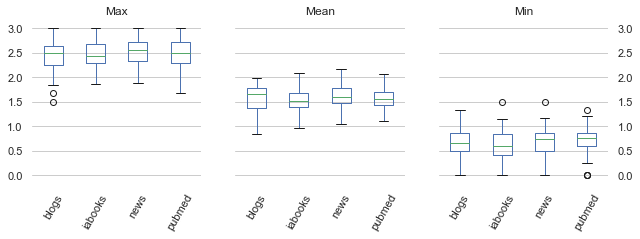

In [79]:
def plot_netl(statz, name=None):
    
    sns.set(style="whitegrid")
    #sns.set()

    # Initialize the figure
    fig, axs = plt.subplots(ncols=3, sharey=True, figsize=(10, 3))
    sns.despine(bottom=True, left=True)

    av = statz.avg.groupby('topic_id').mean()
    mx = statz.avg.groupby('topic_id').max()
    mn = statz.avg.groupby('topic_id').min()
    
    metrics = pd.concat([av, mx, mn], axis=1, keys=['Mean', 'Max', 'Min'])
    metrics['dataset'] = metrics.index.to_series().apply(lambda x: statz.dataset[x].values[0])

    rotation = 60
    metrics.boxplot(column='Max', ax=axs[0], by='dataset', rot=rotation, showfliers=True)
    metrics.boxplot(column='Mean', ax=axs[1], by='dataset', rot=rotation, showfliers=True)
    metrics.boxplot(column='Min', ax=axs[2], by='dataset', rot=rotation, showfliers=True)

    for ax in axs:
        ax.xaxis.label.set_visible(False)
        ax.xaxis.grid(False)
    axs[2].yaxis.set_tick_params(labelright=True, labelleft=False)
    plt.suptitle('')
    if name is not None:
        fig.savefig(f'../img/label_annotations_{name}.pdf', bbox_inches='tight')

netl_tpx = pd.read_csv('../data/corpora/topiclabel/2016/topics.csv', sep=',', index_col=[0])
netl_tpx

netl = (
    pd.
    read_csv('../data/corpora/topiclabel/2016/annotated_dataset.csv', sep='\t', index_col=[0])
    .astype({'topic_id':int})
    .set_index('topic_id')
)

ncols = [c for c in netl.columns]
netl['avg'] = netl.mean(axis=1)
netl['sd'] = netl[ncols].mean(axis=1)
netl = netl.join(netl_tpx.domain).rename(columns={'domain':'dataset'})#.set_index('dataset', append=True)
plot_netl(netl, 'netl')

In [46]:
statz_full

rating1  rating2  rating3  rating4  \
topic_id label                                                                  
0        Naturwissenschaftler                    1        3        1        1   
         Wissenschaft                            2        3        3        2   
         Grundlagenforschung                     1        3        1        1   
         Humanwissenschaft                       1        3        1        2   
         Forschung und Lehre                     1        3        2        2   
         Methodologie                            1        2        0        1   
         Wissenschaftler                         2        3        3        2   
         Wissenschaftliche Gesellschaft          1        3        1        1   
         Runologie                               1        3        0        1   
         Forschung                               2        3        3        2   
         Philosophie                             1        3        0        2   
         Sozialwissenschaften                    1        3        1        2   
         Fachgebiet                              1        3        0        2   
         Anthropologie                           1        3        0        2   
         Neurowissenschaften                     1        2        1        2   
         Akademie der Wissenschaften             1        3        0        1   
         Philologie                              1        3        0        2   
         Medizingeschichte                       1        2        0        1   
         Wissenschaftliche Arbeit                1        3        1        2   
         Deutsches Historisches Institut         1        2        0        1   
1        Aspekte Salzburg                        1        0        1        0   
         Klassische Musik                        1        3        2        3   
         Andreas Staier                          1        0        1        0   
         Musik sein                              1        0        1        3   
         Kunstform                               1        1        1        3   
         Hochschule für Musik                    1        1        1        3   
         Bayerischer Poetentaler                 1        0        1        0   
         Musik                                   2        2        2        3   
         Konzert                                 1        3        2        3   
         Alte Musik                              1        2        1        3   
         Aufführung                              1        2        1        3   
         Neue Musik                              1        2        1        3   
         Weltmusik                               1        1        1        3   
         Musikkritiker                           1        0        2        1   
         Volksmusik                              1        1        1        3   
         Singer-Songwriter                       1        0        1        3   
         Musiker                                 1        2        2        3   
         Liederabend                             1        1        2        3   
         Tanzmusik                               1        0        1        3   
         Liedermacher                            1        0        2        3   
2        Religion                                3        2        3        3   
         Heilige Schriften                       1        1        0        1   
         Christentum                             1        1        1        3   
         Ostkirchenkunde                         1        0        0        2   
         Judentum                                1        1        0        2   
         Religiöse Minderheit                    1        2        0        1   
         Atheismus                               1        2        0        0   
         Offenbarungsreligion                    1        2        0      

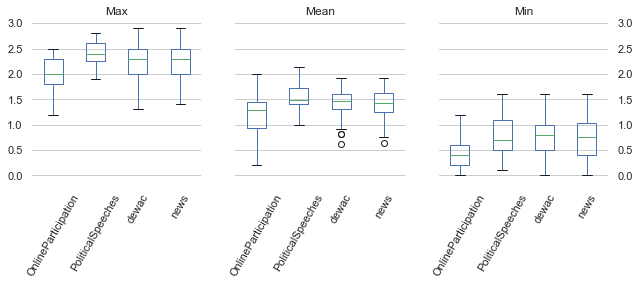

In [37]:
plot_stats(statz_full, 'full')

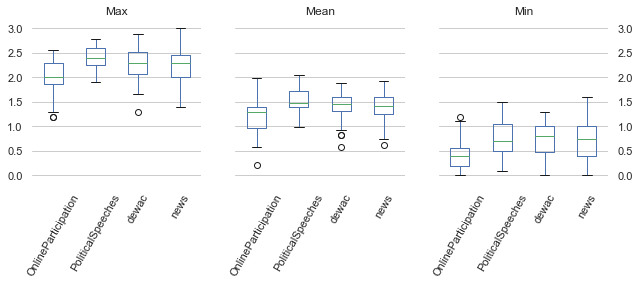

In [38]:
plot_stats(statz_removed_constants, 'removed-constants')

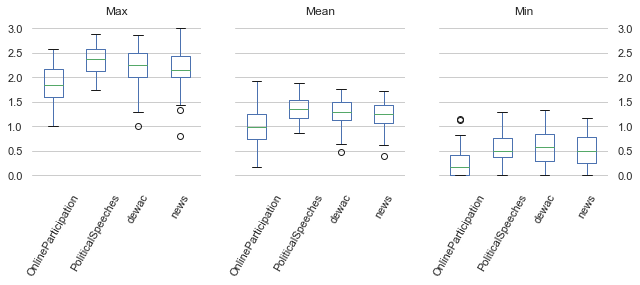

In [39]:
plot_stats(statz_cleaned_part, 'cleaned_part')

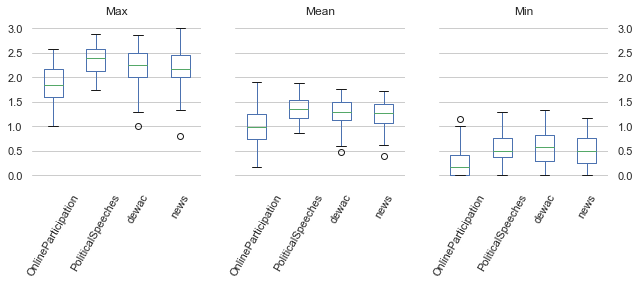

In [40]:
plot_stats(statz_cleaned_full, 'cleaned_full')

In [35]:
# mean standard deviation for top-3 terms
def mean_sd(df, topn=3):
    return (
        df
        .drop(['sd', 'cnt'], axis=1)
        .groupby('topic_id', as_index=False)
        .apply(lambda grp: grp.sort_values('avg', ascending=False).head(topn))
        .drop('avg', axis=1)
    ).std(axis=1).mean()

round(mean_sd(statz_full), 2), round(mean_sd(statz_cleaned_full), 2)

(0.78, 0.72)

-----

### Visualize agreement (on example topic)

In [36]:
annos = df[rate_cols].stack().reset_index(-1, drop=True)
gurus = df[guru_cols].stack().reset_index(-1, drop=True)
annos.name = 'annotation'
gurus.name = 'guru'
stacked = pd.concat([annos, gurus], axis=1)
stacked

annotation     guru
topic_id label                                              
0        Naturwissenschaftler                     1      133
         Naturwissenschaftler                     3  1300537
         Naturwissenschaftler                     1  3400103
         Naturwissenschaftler                     1  3800338
         Naturwissenschaftler                     1  5000555
         Naturwissenschaftler                     3  5500469
         Naturwissenschaftler                     1  6000143
         Naturwissenschaftler                     1  6800408
         Naturwissenschaftler                     2  8000582
         Naturwissenschaftler                     1  8500047
         Wissenschaft                             2      133
         Wissenschaft                             3  1300537
         Wissenschaft                             3  3400103
         Wissenschaft                             2  3800338
         Wissenschaft                             3  5000555
         Wissenschaft                             3  5500469
         Wissenschaft                             2  6000143
         Wissenschaft                             1  6800408
         Wissenschaft                             1  8000582
         Wissenschaft                             2  8500047
         Grundlagenforschung                      1      133
         Grundlagenforschung                      3  1300537
         Grundlagenforschung                      1  3400103
         Grundlagenforschung                      1  3800338
         Grundlagenforschung                      1  5000555
         Grundlagenforschung                      3  5500469
         Grundlagenforschung                      1  6000143
         Grundlagenforschung                      1  6800408
         Grundlagenforschung                      2  8000582
         Grundlagenforschung                      2  8500047
         Humanwissenschaft                        1      133
         Humanwissenschaft                        3  1300537
         Humanwissenschaft                        1  3400103
         Humanwissenschaft                        2  3800338
         Humanwissenschaft                        1  5000555
         Humanwissenschaft                        3  5500469
         Humanwissenschaft                        1  6000143
         Humanwissenschaft                        3  6800408
         Humanwissenschaft                        2  8000582
         Humanwissenschaft                        1  8500047
         Forschung und Lehre                      1      133
         Forschung und Lehre                      3  1300537
         Forschung und Lehre                      2  3400103
         Forschung und Lehre                      2  3800338
         Forschung und Lehre                      3  5000555
         Forschung und Lehre                      3  5500469
         Forschung und Lehre                      1  6000143
         Forschung und Lehre                      1  6800408
         Forschung und Lehre                      1  8000582
         Forschung und Lehre                      2  8500047
         Methodologie                             1      133
         Methodologie                             2  1300537
         Methodologie                             0  3400103
         Methodologie                             1  3800338
         Methodologie                             1  5000555
         Methodologie                             3  5500469
         Methodologie                             1  6000143
         Methodologie                             1  6800408
         Methodologie                             2  8000582
         Methodologie                             1  8500047
         Wissenschaftler                          2      133
         Wissenschaftler                          3  1300537
         Wissenschaftler                          3  3400103
         Wissenschaftler                          2  3800338
         Wissen

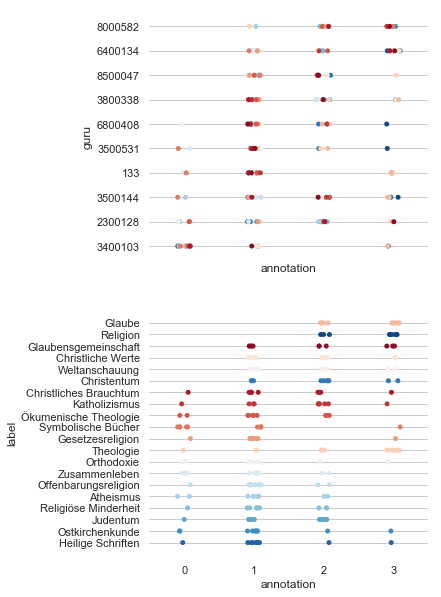

In [37]:
topic = (
    stacked
    .query('topic_id == 2')
    .astype({'guru': str})
    .reset_index('label')
    #.rename(columns={'level_1': 'label'})
    .reset_index(drop=True)
)

sns.set(style="whitegrid")

# Initialize the figure
f, ax = plt.subplots(nrows=2, figsize=(5, 10), sharex=True)
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sp = sns.stripplot(
    x="annotation", y="guru", hue="label", data=topic, 
    #color='lightblue',
    orient='v',
    #dodge=.01,
    jitter=.1,
    #alpha=.75, 
    zorder=1,
    palette=sns.color_palette("RdBu_r", 20),
    ax=ax[0],
)
ax[0].get_legend().set_visible(False)

sp = sns.stripplot(
    x="annotation", y="label", hue="label", data=topic, 
    #color='lightblue',
    orient='v',
    #dodge=.01,
    jitter=.1,
    #alpha=.75, 
    zorder=1,
    palette=sns.color_palette("RdBu_r", 20),
    ax=ax[1],
)
ax[1].get_legend().set_visible(False)

# Show the conditional means
#sns.pointplot(x="annotation", y="guru", hue="label",
#              data=case1, dodge=.532, join=False, palette="dark",
#              markers="d", scale=.75, ci=None)

# Improve the legend 
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[3:], labels[3:], title="Annotations",
#          handletextpad=0, columnspacing=1,
#          loc="lower right", ncol=3, frameon=True)

-----

### Inter-rater agreement

Fleiss Kappe & Krippendorff Alpha

In [38]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
dat = sm.datasets.get_rdataset("Guerry", "HistData").data
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Sat, 29 Dec 2018   Prob (F-statistic):           1.90e-08
Time:                        03:08:16   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

In [39]:
import numpy as np
import statsmodels.api as sm
nobs = 100
X = np.random.random((nobs, 2))
X = sm.add_constant(X)
beta = [1, .1, .5]
e = np.random.random(nobs)
y = np.dot(X, beta) + e
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     9.147
Date:                Sat, 29 Dec 2018   Prob (F-statistic):           0.000229
Time:                        03:08:16   Log-Likelihood:                -16.501
No. Observations:                 100   AIC:                             39.00
Df Residuals:                      97   BIC:                             46.82
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5674      0.082     19.069      0.0

In [40]:
sm.stats.inter_rater.fleiss_kappa(table, method='fleiss')

AttributeError: module 'statsmodels.stats.api' has no attribute 'inter_rater'

-----

# Evaluation of Label Ranking

In [7]:
labels = pd.read_csv('../data/crowdsourcing/Crowdguru/data/labels_final.csv', index_col=[0, 1])
orig = pd.read_excel(join(DATA_BASE, '20181217_Lieferung_Universität Düsseldorf_Label-Bewertungen_Crowd Guru.xlsx')).rename(columns={'Case ID': 'topic_id'})
orig.topic_id -= 1

def transform(grp):
    sers = []
    dic = dict()
    for i in range(20):
        label = grp[f'label{i}'][0]
        ratings = grp.loc[:, f'Bewertung label{i}'].reset_index(drop=True).rename(index=lambda x: f'rating{x+1}')
        guru_ids = grp.loc[:, f'guru_id anonymisiert'].reset_index(drop=True).rename(index=lambda x: f'guru{x+1}')
        ser = ratings.append(guru_ids)
        ser.name = label
        sers.append(ser)
    df = pd.DataFrame(sers)
    return df

df = orig.set_index(['CG ID', 'topic_id', 'dataset', 'topic_idx']).iloc[:, 11:].groupby('topic_id', sort=False).apply(transform)
df.index = df.index.rename(names='label', level=-1)
df = df.loc[:, 'rating1':'rating10']
avg = df.mean(axis=1)
def gb(grp):
    grp = grp.reset_index(drop=True).drop('label', axis=1)
    return grp.squeeze()
    

gold = avg.to_frame().reset_index('label').groupby('topic_id').apply(gb)
gold.reset_index()
a = gold.reset_index()
a.index = labels.index.copy()
a = a.set_index('topic_id', append=True)

In [8]:
dataset = 'N'
d = f'supervised_labels_cleaned_full__testset_{dataset}__trainset_dewac_pred.csv'
dataset = DSETS[dataset]

file = join('../data/ranker', d)
pred = pd.read_csv(file, index_col=[0])
pred.columns = [int(x) for x in pred.columns]

gld = a.query('dataset == @dataset').reset_index(drop=True)
values = []
for k, v in pred.idxmax(axis=1).to_frame().itertuples():
    values.append(gld.loc[k, v])

gld.max(axis=1).mean(), mean(values)

(2.2249999999999996, 1.8616666666666668)

------

#### results Label Reranking

dewac - rest: (2.2555555555555546, 2.005555555555555)
dewac - O : (2.2555555555555546, 1.9402777777777775)
dewac - N: (2.2555555555555546, 2.005555555555555)
dewac - P: (2.2555555555555546, 2.0125)

O - rest: (2.018181818181819, 1.7340909090909093)
O - P: (2.018181818181819, 1.7500000000000007)
O - N (2.018181818181819, 1.725)
O - d (2.018181818181819, 1.7022727272727274)

P - rest: (2.3883720930232557, 2.0860465116279068)
P - O (2.3883720930232557, 2.009302325581395)
P - N (2.3883720930232557, 2.0860465116279068)
P - dewac: (2.3883720930232557, 2.067441860465116)

N - rest: (2.2249999999999996, 1.841666666666667)
N - O (2.2249999999999996, 1.8133333333333335)
N - P (2.2249999999999996, 1.8966666666666667)
N - d (2.2249999999999996, 1.8616666666666668)